In [94]:
from cdl_helper import read_in_all_matches, CDL_PALETTE
import matplotlib.pyplot as plt
import seaborn as sns

df = read_in_all_matches()
major_3_df = df[df['event'].isin(['M3Event', 'M3Qual'])]
major_3_total = major_3_df[['alias', 'abbrev', 'totalKills', 'totalDeaths', 'totalAssists']].groupby(['alias', 'abbrev']).sum().reset_index()

major_3_total.sample(5)

,alias,abbrev,totalKills,totalDeaths,totalAssists
45,TJHaLy,LV,434.0,509.0,142.0
26,JoeDeceives,LAG,437.0,456.0,132.0
11,Capsidal,FLA,454.0,521.0,121.0
19,FeLo,FLA,412.0,447.0,143.0
17,Envoy,LAT,538.0,545.0,157.0


In [95]:
major_3_total['kd'] = (major_3_total['totalKills'] / major_3_total['totalDeaths']).round(3)
major_3_total['kda'] = ((major_3_total['totalKills']+major_3_total['totalAssists']) / major_3_total['totalDeaths']).round(3)

In [96]:
major_3_total.sample(5)

,alias,abbrev,totalKills,totalDeaths,totalAssists,kd,kda
14,CleanX,TOR,750.0,709.0,229.0,1.058,1.381
48,aBeZy,ATL,597.0,560.0,164.0,1.066,1.359
46,Temp,LV,444.0,441.0,159.0,1.007,1.367
34,PaulEhx,LDN,406.0,454.0,138.0,0.894,1.198
45,TJHaLy,LV,434.0,509.0,142.0,0.853,1.132


In [97]:
top_10_kd = major_3_total.sort_values('kd', ascending=False).iloc[:10].reset_index(drop=True)
bot_10_kd = major_3_total.sort_values('kd', ascending=False).iloc[-10:].reset_index(drop=True)

top_10_kda = major_3_total.sort_values('kda', ascending=False).iloc[:10].reset_index(drop=True)
bot_10_kda = major_3_total.sort_values('kda', ascending=False).iloc[-10:].reset_index(drop=True)

bot_10_kd

,alias,abbrev,totalKills,totalDeaths,totalAssists,kd,kda
0,FeLo,FLA,412.0,447.0,143.0,0.922,1.242
1,Arcitys,LAG,378.0,415.0,137.0,0.911,1.241
2,Hicksy,TOR,542.0,602.0,183.0,0.900,1.204
3,PaulEhx,LDN,406.0,454.0,138.0,0.894,1.198
4,2ReaL,LV,425.0,482.0,138.0,0.882,1.168
5,Capsidal,FLA,454.0,521.0,121.0,0.871,1.104
6,Standy,TOR,66.0,77.0,29.0,0.857,1.234
7,TJHaLy,LV,434.0,509.0,142.0,0.853,1.132
8,Vivid,BOS,591.0,694.0,191.0,0.852,1.127
9,Bance,MIN,299.0,390.0,100.0,0.767,1.023


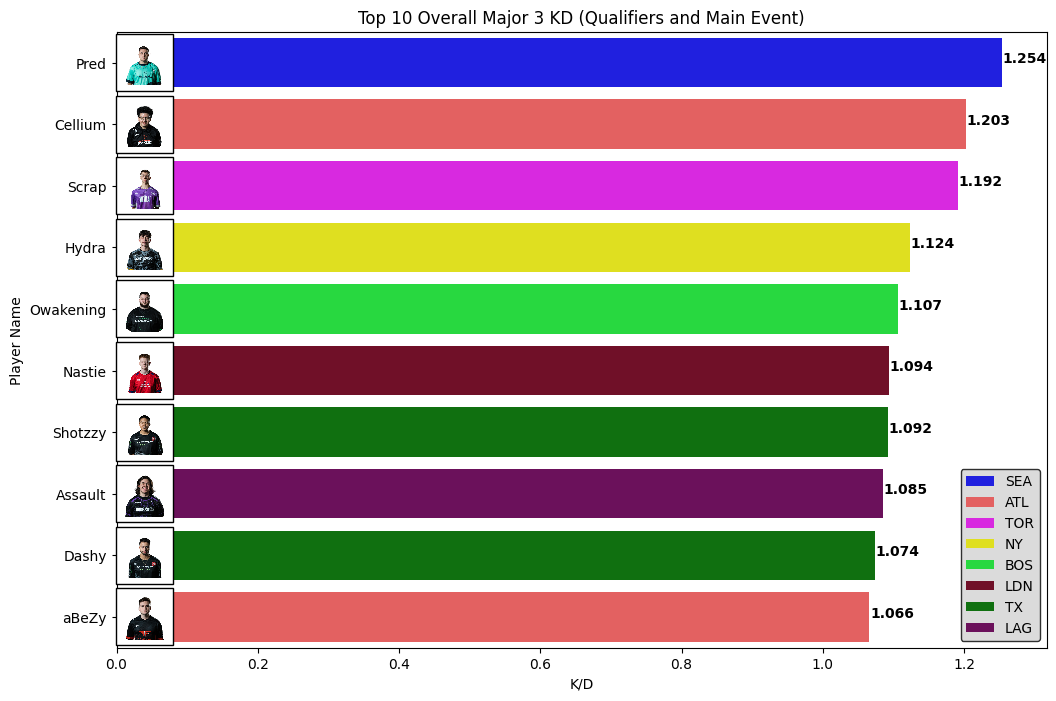

In [98]:
import matplotlib.image as image
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

fig = plt.figure(figsize=(12, 8))
ax1 = fig.subplots()

sns.barplot(data=top_10_kd, y='alias', x='kd', dodge=False, hue='abbrev', palette=CDL_PALETTE, ax=ax1, orient='horizontal');
frame = ax1.legend(loc='lower right').get_frame()
frame.set_color('lightgrey')
frame.set_edgecolor('black')
ax1.set_xlabel("K/D")
ax1.set_ylabel("Player Name")
ax1.set_title("Top 10 Overall Major 3 KD (Qualifiers and Main Event)")

for x, y, name in zip(ax1.get_yticks(), top_10_kd['kd'], top_10_kd['alias']):
    plt.text(y+0.063, x, y, weight='bold', horizontalalignment='right')
    img = image.imread(f'../images/{name}_headshot.png')
    im_box = OffsetImage(img, zoom=0.055)
    anno = AnnotationBbox(im_box, (ax1.get_xlim()[0], x),frameon=True, box_alignment=(-0.1, 0.5))
    ax1.add_artist(anno)

In [110]:
def draw_players(xlabel, title, data, col_name):

    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.subplots()

    sns.barplot(data=data, y='alias', x=col_name, dodge=False, hue='abbrev', palette=CDL_PALETTE, ax=ax1, orient='horizontal');
    frame = ax1.legend(bbox_to_anchor=(1, 0.6)).get_frame()
    frame.set_color('lightgrey')
    frame.set_edgecolor('black')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel("Player Name")
    ax1.set_title(title)

    for x, y, name in zip(ax1.get_yticks(), data[col_name],data['alias']):
        plt.text(y, x, y, weight='bold', horizontalalignment='left')
        img = image.imread(f'../images/{name}_headshot.png')
        im_box = OffsetImage(img, zoom=0.055)
        anno = AnnotationBbox(im_box, (ax1.get_xlim()[0], x),frameon=True, box_alignment=(-0.1, 0.5))
        ax1.add_artist(anno)

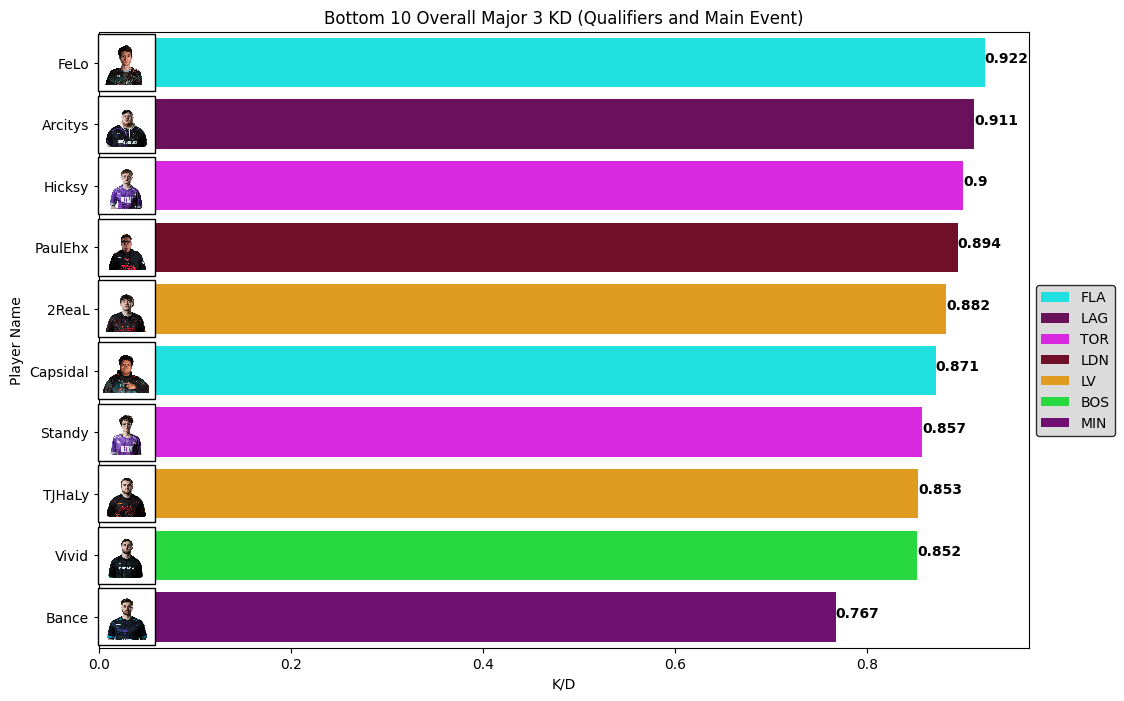

In [111]:
draw_players("K/D", "Bottom 10 Overall Major 3 KD (Qualifiers and Main Event)", bot_10_kd, 'kd')

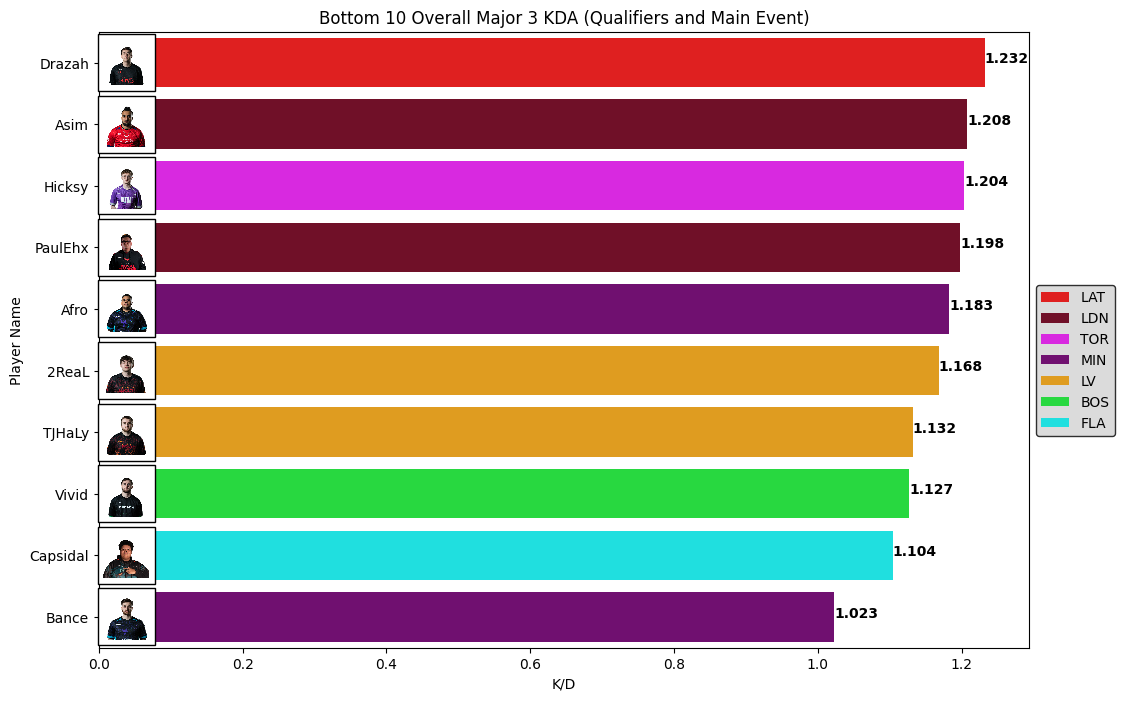

In [112]:
draw_players("KDA", "Bottom 10 Overall Major 3 KDA (Qualifiers and Main Event)", bot_10_kda, 'kda')

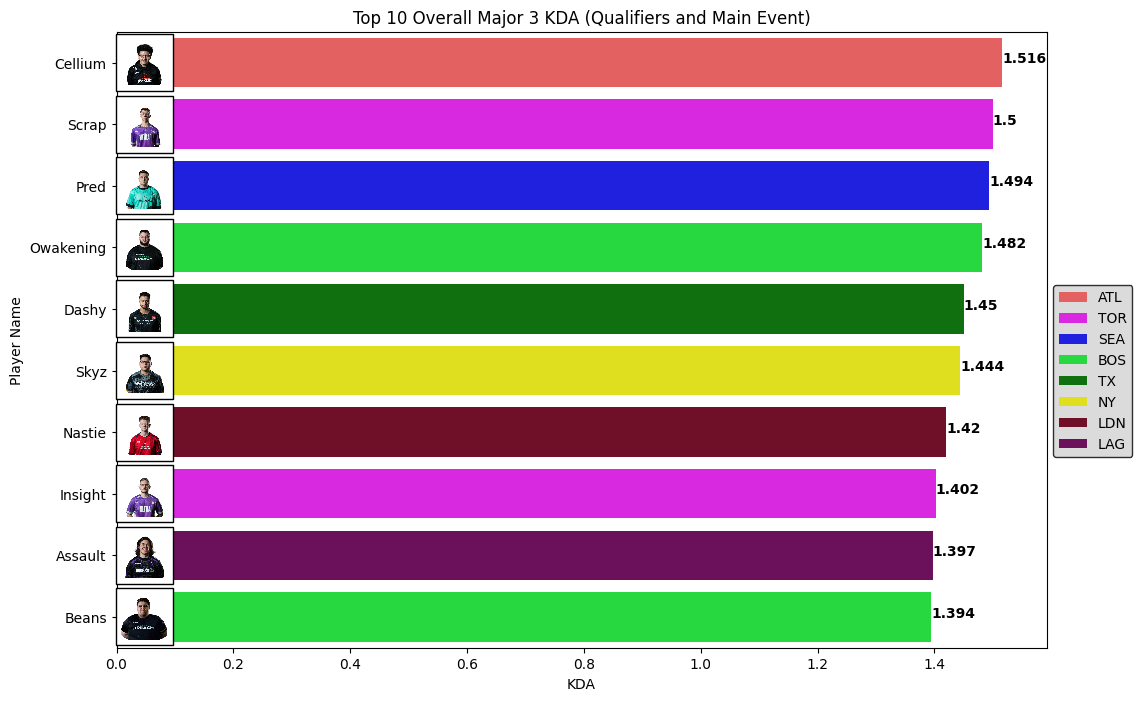

In [113]:
draw_players("KDA", "Top 10 Overall Major 3 KDA (Qualifiers and Main Event)", top_10_kda, 'kda')